In [2]:
import numpy as np
from numpy.random import rand, randint
import matplotlib.pyplot as plt

In [3]:
def init_S():
  return np.ones((30,30))

def calcMeanMag(S):
  N = np.shape(S)[0]
  return (1/(N**2)) * np.sum(S)

def analyticalPred(betas):
  predict = np.array([])
  for beta in betas:
    if beta < 0.4408: predict = np.append(predict, 0)
    else: predict = np.append(predict, (1 - (np.sinh(2*beta))**(-4))**(1/8))
  return predict

def move(S,beta):
  N = np.shape(S)[0]
  k = randint(0, N)
  l = randint(0, N)
  s = S[k,l]
  neighbors = S[(k+1)%N, l] + S[k, (l+1)%N] + S[(k-1)%N, l] + S[k, (l-1)%N]
  deltaH = 2*s*neighbors
  accept = False
  if deltaH < 0:
    accept = True
  else:
    u = rand()
    if u < np.exp(-beta*deltaH): accept = True
  if accept:
      S[k,l] = -s
  return S

In [22]:
betas = np.arange(0.2,1.01,.01)
itermax = 1e7
mus = np.array([])
vars = np.array([])

for beta in betas:
  S = init_S()
  N = np.shape(S)[0]
  m = calcMeanMag(S)
  v = 0
  mu = m
  i = 1
  while i <= itermax:
    move(S,beta)
    m = calcMeanMag(S)
    tmp = (m - mu)
    mu = (i * mu + m)/(i + 1)
    v += tmp*(m - mu)/i


    i += 1
  mus = np.append(mus, mu)
  vars = np.append(vars, v)


C:\Users\James\AppData\Local\Temp\ipykernel_5588\989301559.py:2: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(betas, mus+np.sqrt(vars), 'r-', linestyle='dashed')
C:\Users\James\AppData\Local\Temp\ipykernel_5588\989301559.py:3: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(betas, mus-np.sqrt(vars), 'r-', linestyle='dashed')


Text(0, 0.5, 'Mean Magnetization')

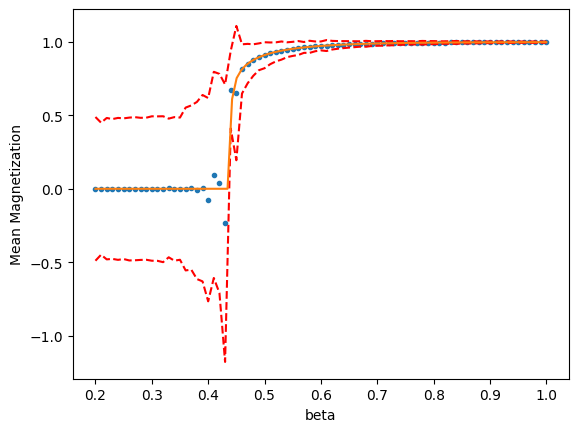

In [23]:
plt.plot(betas,mus, '.')
plt.plot(betas, mus+np.sqrt(vars), 'r-', linestyle='dashed')
plt.plot(betas, mus-np.sqrt(vars), 'r-', linestyle='dashed')
b = np.linspace(0.2,1,100)
plt.plot(b, analyticalPred(b))
plt.xlabel('beta')
plt.ylabel('Mean Magnetization')